In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
fr = pd.read_csv("Fertility_Rate.csv")
fr = fr.drop(columns=['Country Code','Indicator Name','Indicator Code','Unnamed: 65'])
fr = fr.set_index('Country Name')

In [3]:
gdp = pd.read_csv("GDP.csv")
gdp = gdp.drop(columns=['Country Code','Indicator Name','Indicator Code','Unnamed: 65'])
gdp = gdp.set_index('Country Name')

In [4]:
inc = pd.read_csv("Income_per_Capita.csv")
inc = inc.drop(columns=['Country Code','Indicator Name','Indicator Code','Unnamed: 65'])
inc = inc.set_index('Country Name')

In [5]:
inf = pd.read_csv("Inflation.csv")
inf = inf.drop(columns=['Country Code','Indicator Name','Indicator Code','Unnamed: 65'])
inf = inf.set_index('Country Name')

# Economic Factors Contributing to Global Fertility Rates

One of the article's main points is that fertility rates are significantly lower for industrialized/developed countries to the point that their fertility rates are dropping lower than the replacement fertility rate needed to maintain a population's size. However, there is no clarification made as to which countries are developed and which are not. 

Some example quotes from the article are shown below:  
"Fertility rates tend to be higher in poorly resourced countries but due to high maternal and perinatal mortality, there is a reduction in birth rates. In developing countries children are needed as a labour force and to provide care for their parents in old age."  
"Developed countries tend to have a lower fertility rate due to lifestyle choices associated with economic affluence where mortality rates are low."

In this section, we'll be examining the relationship between a country's overall economic status and the fertility rate of its population. But first, we'll need to determine a classification of countries to compare fertility rates across different economic levels.

In the article, the author divides the world's nations into two classes, developed and developing, but we believe this is not an adequate organization of global economies. In the graph below, it is clear that fertility rates differ widely among countries, but classifying each of them to two categories would not properly distinguish the countries into meaningful groups. Instead, we'll be using a different system of categorizing countries that can give us a better picture of how fertility rates correlate with economic status by utilizing four economic groupings.

In [6]:
fr_flip = fr.transpose()

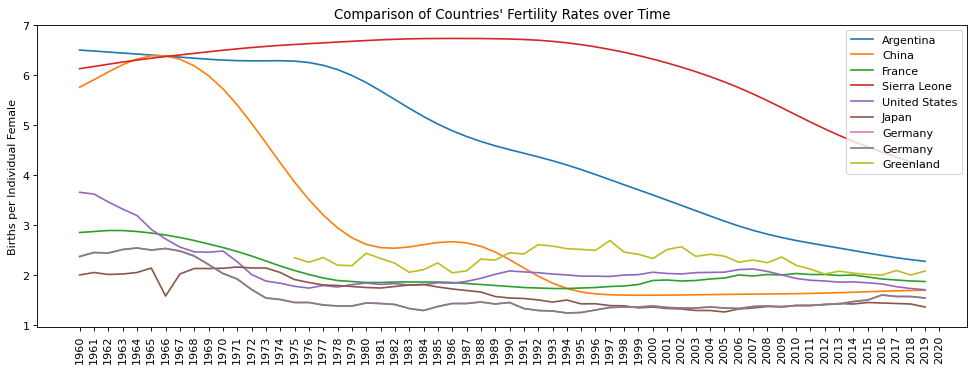

In [7]:
figure(figsize=(15, 5), dpi=80)
plt.plot(fr_flip['Belize'], label='Argentina')
plt.plot(fr_flip['China'], label='China')
plt.plot(fr_flip['France'], label='France')
plt.plot(fr_flip['Sierra Leone'], label='Sierra Leone')
plt.plot(fr_flip['United States'], label='United States')
plt.plot(fr_flip['Japan'], label='Japan')
plt.plot(fr_flip['Germany'], label='Germany')
plt.plot(fr_flip['Germany'], label='Germany')
plt.plot(fr_flip['Greenland'], label='Greenland')
plt.ylabel('Births per Individual Female')
plt.legend()
plt.title("Comparison of Countries' Fertility Rates over Time")
plt.xticks(rotation = 90)
plt.show()

## Assigning Country Classifications
We'll be using the World Bank's classification of country economies based off their gross national income(GNI) per capita which categorizes countries into four major economic groups: lower, lower-middle, upper-middle, and high.
The categories can be found here: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups.
The groups were made using the following definitions:

Lower - GNI per capita at \\$1045 or less

Lower-middle - GNI per capita between \\$1046 and \\$4095

Upper-middle - GNI per capita between \\$4096 and \\$12695

High - GNI per capita of \\$12696 or more

Ten countries were semi-randomly selected from each category with a prerequisite of having a population over one million.

In [8]:
lower_income = ['Afghanistan','Liberia','Chad','Madagascar','Mali','Uganda','Sudan','Niger','Sierra Leone','Burundi']
lower_middle = ['Bangladesh','Cameroon','Ukraine','Zimbabwe','Haiti','Philippines','Tanzania','Nicaragua','Kenya','Honduras']
upper_middle = ['Dominican Republic','Ecuador','Fiji','Thailand','Turkey','Paraguay','Namibia','Cuba','South Africa','Belarus']
high_income = ['Japan','Spain','Kuwait','Sweden','Chile','Latvia','Uruguay','Canada','United States','Singapore']
combined = lower_income + lower_middle + upper_middle + high_income

# Analyzing Replacement Rates:



In [9]:
fr_flip = fr_flip.assign(LOWER=fr_flip[lower_income].mean(1))
fr_flip = fr_flip.assign(LOWER_MIDDLE=fr_flip[lower_middle].mean(1))
fr_flip = fr_flip.assign(UPPER_MIDDLE=fr_flip[upper_middle].mean(1))
fr_flip = fr_flip.assign(HIGH=fr_flip[high_income].mean(1))

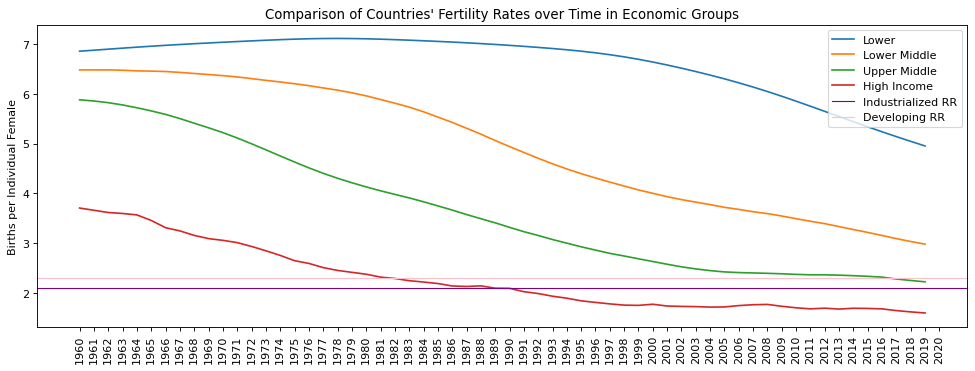

In [10]:
figure(figsize=(15, 5), dpi=80)
plt.plot(fr_flip['LOWER'], label='Lower')
plt.plot(fr_flip['LOWER_MIDDLE'], label='Lower Middle')
plt.plot(fr_flip['UPPER_MIDDLE'], label='Upper Middle')
plt.plot(fr_flip['HIGH'], label='High Income')
plt.axhline(y=2.1, linewidth='1',color='purple', label='Industrialized RR')
plt.axhline(y=2.3, linewidth='1',color='pink', label='Developing RR')
plt.ylabel('Births per Individual Female')
plt.legend()
plt.title("Comparison of Countries' Fertility Rates over Time in Economic Groups")
plt.xticks(rotation = 90)
plt.show()

Here we visualized the change in fertility rate from 1960 to 2020 in the four groups. The purple horizontal line represents the replacement rate for "industrialized" countries at 2.3 while the pink horizontal lines represents the replacement rate for "developing" countries. As shown by the graph, high income countries are dropping significantly below the replacement rate for industrialized countries, but countries in the other three categories remain above the replacement rate with the Upper-middle value coming somewhat close. 

# Economic factors that may influence fertility rates.

## 1. GDP

In [11]:
gdp_flip = gdp.transpose()

In [12]:
gdp_flip = gdp_flip.assign(LOWER=gdp_flip[lower_income].mean(1))
gdp_flip = gdp_flip.assign(LOWER_MIDDLE=gdp_flip[lower_middle].mean(1))
gdp_flip = gdp_flip.assign(UPPER_MIDDLE=gdp_flip[upper_middle].mean(1))
gdp_flip = gdp_flip.assign(HIGH=gdp_flip[high_income].mean(1))

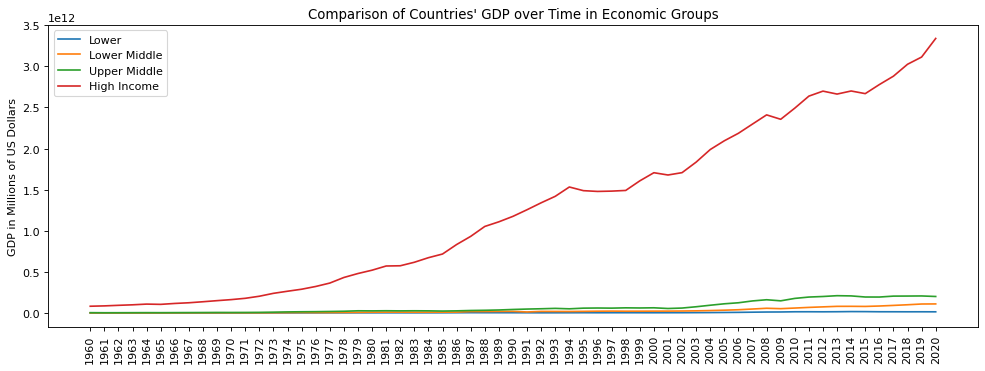

In [15]:
figure(figsize=(15, 5), dpi=80)
plt.plot(gdp_flip['LOWER'], label='Lower')
plt.plot(gdp_flip['LOWER_MIDDLE'], label='Lower Middle')
plt.plot(gdp_flip['UPPER_MIDDLE'], label='Upper Middle')
plt.plot(gdp_flip['HIGH'], label='High Income')
plt.legend()
plt.ylabel('GDP in Millions of US Dollars')
plt.title("Comparison of Countries' GDP over Time in Economic Groups")
plt.xticks(rotation = 90)
plt.show()

As shown by the graph, the gross domestic product is increasing for all country groups, but the GDP of high income countries are increasing at a much greater rate. Next, we'll compare the GDP of these groups with their respective fertility rates to see if we can find patterns between these two factors.

### Relationship between GDP and Fertility Rate
Hypothesis: The relationship between GDP and fertility rate will have a strong correlation with an average coefficient greater than the absolute value of 6.0 across all economic groups.

In [24]:
@interact
def GDP_graph(category = ['LOWER','LOWER_MIDDLE','UPPER_MIDDLE','HIGH']):
    fig, (ax1, ax2) = plt.subplots(2,figsize = (15,10))
    fig.suptitle('Fertility Rate and GDP Trends for {} Income Countries'.format(category))
    ax1.plot(fr_flip[category], label='Fertility Rate')
    ax2.plot(gdp_flip[category], label='GDP', color='red')
    ax1.set_title("Fertility Rate")
    ax1.set_xlabel("Year")
    ax1.tick_params(axis='x', labelrotation=90)
    ax1.set_ylabel("Fertility Rate im Births per Individual Female")
    ax2.set_title("GDP")
    ax2.set_xlabel("Year")
    ax2.tick_params(axis='x', labelrotation=90)
    ax2.set_ylabel("GDP in Millions of US Dollars")
    plt.tight_layout()
    
    gdp_corr = fr_flip[category].corr(gdp_flip[category])
    print('Correlation between Fertility Rate and GDP in {} Income Countries: '.format(category), gdp_corr.round(3))

interactive(children=(Dropdown(description='category', options=('LOWER', 'LOWER_MIDDLE', 'UPPER_MIDDLE', 'HIGH…

### Results
Correlation coefficients between fertility rates and GDP for all four economic country groups are shown below:  
Lower:        -0.946  
Lower-Middle: -0.865  
Upper-Middle: -0.794  
High:         -0.859  


### Conclusions
We are not able to reject our null hypothesis and conclude that there is a strong relationship between GDP and fertility rates in countries from all economic classes.

## 2. Income per Capita

In [17]:
inc_flip = inc.transpose()

In [18]:
inc_flip = inc_flip.assign(LOWER=inc_flip[lower_income].mean(1))
inc_flip = inc_flip.assign(LOWER_MIDDLE=inc_flip[lower_middle].mean(1))
inc_flip = inc_flip.assign(UPPER_MIDDLE=inc_flip[upper_middle].mean(1))
inc_flip = inc_flip.assign(HIGH=inc_flip[high_income].mean(1))

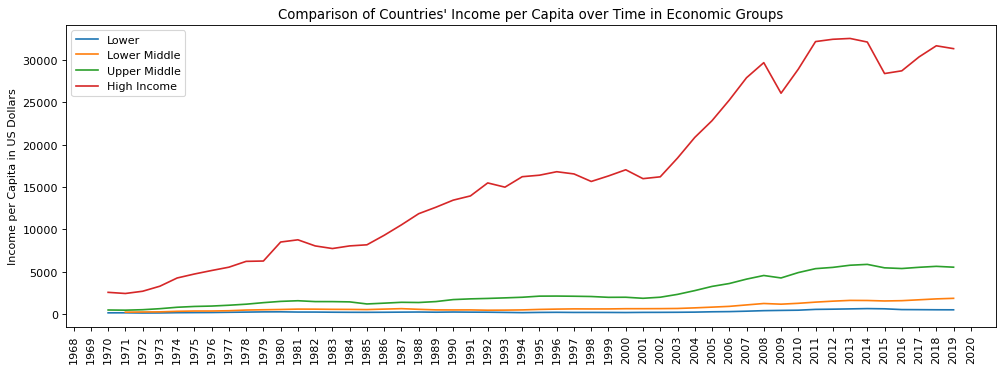

In [19]:
figure(figsize=(15, 5), dpi=80)
plt.plot(inc_flip['LOWER'], label='Lower')
plt.plot(inc_flip['LOWER_MIDDLE'], label='Lower Middle')
plt.plot(inc_flip['UPPER_MIDDLE'], label='Upper Middle')
plt.plot(inc_flip['HIGH'], label='High Income')
plt.ylabel('Income per Capita in US Dollars')
plt.legend()
plt.title("Comparison of Countries' Income per Capita over Time in Economic Groups")
plt.xticks(rotation = 90)
plt.show()

As expected, the rate of growth in income per capita closely resembles the pattern scene in GDP growth. All economic groups show an increase over time, but countries in the high income category show markedly higher growth rates in income per capita than other groups.

### Relationship between Income per Capita and Fertility Rate
Hypothesis: The relationship between income per capita and fertility rate will have a strong correlation with an average coefficient greater than the absolute value of 6.0 across all economic groups.

In [20]:
@interact
def inc_graph(category = ['LOWER','LOWER_MIDDLE','UPPER_MIDDLE','HIGH']):
    fig, (ax1, ax2) = plt.subplots(2,figsize = (15,10))
    fig.suptitle('Fertility Rate and Income per Capita Trends for {} Income Countries'.format(category))
    ax1.plot(fr_flip[category], label='Fertility Rate')
    ax2.plot(inc_flip[category], label='Income per Capita', color='red')
    ax1.set_title("Fertility Rate")
    ax1.set_xlabel("Year")
    ax1.tick_params(axis='x', labelrotation=90)
    ax1.set_ylabel("Fertility Rate")
    ax2.set_title("Income per Capita")
    ax2.set_xlabel("Year")
    ax2.tick_params(axis='x', labelrotation=90)
    ax2.set_ylabel("Income")
    plt.tight_layout()
    inc_corr = fr_flip[category].corr(inc_flip[category])
    print('Correlation between Fertility Rate and Income per Capita in {} Income Countries: '.format(category), inc_corr.round(3))

interactive(children=(Dropdown(description='category', options=('LOWER', 'LOWER_MIDDLE', 'UPPER_MIDDLE', 'HIGH…

### Results
Correlation coefficients between fertility rates and Income per Capita for all four economic country groups are shown below:  
Lower:        -0.903  
Lower-Middle: -0.820  
Upper-Middle: -0.803  
High:         -0.864  


### Conclusions
We are not able to reject our null hypothesis and conclude that there is a strong relationship between GDP and Income per Capita in countries from all economic classes.

## 3. Inflation

In [21]:
inf_flip = inf.transpose()
inf_flip = inf_flip.assign(LOWER=inf_flip[lower_income].mean(1))
inf_flip = inf_flip.assign(LOWER_MIDDLE=inf_flip[lower_middle].mean(1))
inf_flip = inf_flip.assign(UPPER_MIDDLE=inf_flip[upper_middle].mean(1))
inf_flip = inf_flip.assign(HIGH=inf_flip[high_income].mean(1))

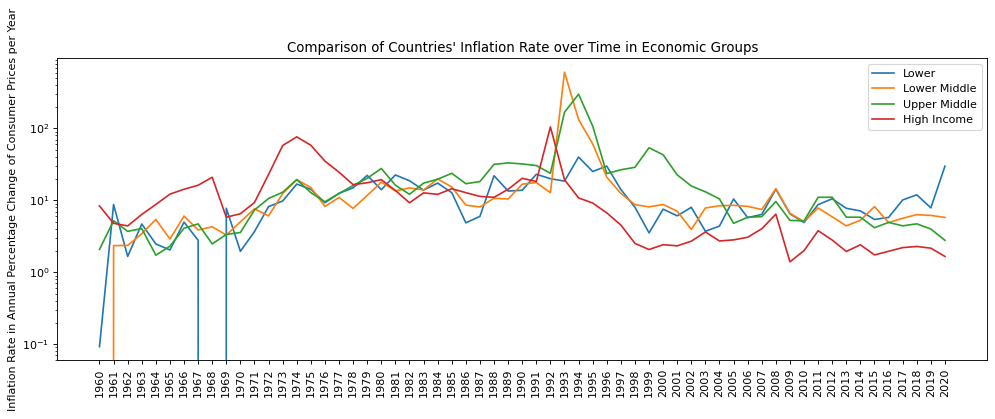

In [22]:
figure(figsize=(15, 5), dpi=80)
plt.plot(inf_flip['LOWER'], label='Lower')
plt.plot(inf_flip['LOWER_MIDDLE'], label='Lower Middle')
plt.plot(inf_flip['UPPER_MIDDLE'], label='Upper Middle')
plt.plot(inf_flip['HIGH'], label='High Income')
plt.ylabel('Inflation Rate in Annual Percentage Change of Consumer Prices per Year')
plt.legend()
plt.title("Comparison of Countries' Inflation Rate over Time in Economic Groups")
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

Unlike the previous two factors, inflation rates do not show any discernible pattern across all economic groups. The graph was made using a logarithmic scale due to a dramatic increase in inflation rate in the early nineties in Lower and Upper Middle Countries.

### Relationship between Inflation Rate and Fertility Rate
Hypothesis: The relationship between inflation rate and fertility rate will have a strong correlation with an average coefficient greater than the absolute value of 6.0 across all economic groups.

In [25]:
@interact
def inf_graph(category = ['LOWER','LOWER_MIDDLE','UPPER_MIDDLE','HIGH']):
    fig, (ax1, ax2) = plt.subplots(2,figsize = (15,10))
    fig.suptitle('Fertility Rate and Inflation Rate Trends for {} Income Countries'.format(category))
    ax1.plot(fr_flip[category], label='Fertility Rate')
    ax2.plot(inf_flip[category], label='Inflation Rate', color='red')
    ax1.set_title("Fertility Rate")
    ax1.set_xlabel("Year")
    ax1.tick_params(axis='x', labelrotation=90)
    ax1.set_ylabel("Fertility Rate")
    ax2.set_title("Inflation Rate in Annual Percentage Change of Consumer Prices per Year")
    ax2.set_xlabel("Year")
    ax2.tick_params(axis='x', labelrotation=90)
    ax2.set_ylabel("Income")
    plt.tight_layout()
    inf_corr = fr_flip[category].corr(inf_flip[category])
    print('Correlation between Fertility Rate and Inflation Rate in {} Income Countries: '.format(category), inf_corr.round(3))

interactive(children=(Dropdown(description='category', options=('LOWER', 'LOWER_MIDDLE', 'UPPER_MIDDLE', 'HIGH…

### Results
Correlation coefficients between fertility rates and inflation rate for all four economic country groups are shown below:  
Lower:        0.217  
Lower-Middle: -0.049  
Upper-Middle: -0.17  
High:         0.213  


### Conclusions
We are reject our null hypothesis and conclude that there is not a strong relationship between inflation rate and fertility rates in countries from all economic classes.